In [86]:
import requests
import json
import pandas as pd
import hvplot.pandas
from MCForecastTools import MCSimulation

%matplotlib inline

## Import data from CSV into a Dataframe named 

In [3]:
# Create dataframe from CSV
# Change index label to 'name'
crypto_df = pd.read_csv('./crypto_master.csv')
crypto_df.set_index('name', inplace=True)

In [4]:
# Review dataframe
crypto_df

,circulating_supply,max_supply,symbol,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percentage_change_1h,percentage_change_24h,percentage_change_7d,price,volume_24h
name,,,,,,,,,,,,
Bitcoin,18896418,21000000,BTC,898444455125,-0.779430,-6.248585,-16.833519,-0.779430,-6.248585,-16.833519,47546.000000,26487903760
Litecoin,69153171,84000000,LTC,10593815945,-1.015169,-6.817639,-26.515632,-1.015169,-6.817639,-26.515632,153.190000,1188164711
Namecoin,15828050,21000000,NMC,20191061,3.038225,1.253465,14.364648,3.038225,1.253465,14.364648,1.300000,12606
Terracoin,22935396,42000000,TRC,452255,5.944261,5.271751,-15.372514,5.944261,5.271751,-15.372514,0.019958,199
Peercoin,27047999,2000000000,PPC,24927928,-0.223310,0.143550,21.385488,-0.223310,0.143550,21.385488,0.921618,9697
...,...,...,...,...,...,...,...,...,...,...,...,...
Ztranzit Coin,0,3000000,ZTNZ,0,-1.339305,10.893162,15.271993,-1.339305,10.893162,15.271993,2.300000,145188
Zuplo,0,18000000,ZLP,0,0.000000,-2.884284,-76.539984,0.000000,-2.884284,-76.539984,0.000446,0
Zyro,0,300000000,ZYRO,0,7.361045,-3.170483,-53.121708,7.361045,-3.170483,-53.121708,0.010022,56931


## Sort data into dataframes

In [5]:
# Sort data by Top 100 curencies by Market Cap and creat dataframe
top100_market_cap = crypto_df.sort_values(by='market_cap', ascending=False)[0:100]
top100_market_cap

# Create Top 50, Top 20, Top 10 dataframes
top50_market_cap = top100_market_cap[0:50]
top20_market_cap = top100_market_cap[0:20]
top10_market_cap = top100_market_cap[0:10]


In [6]:
# Review Dataframe
top10_market_cap

,circulating_supply,max_supply,symbol,market_cap,percent_change_1h,percent_change_24h,percent_change_7d,percentage_change_1h,percentage_change_24h,percentage_change_7d,price,volume_24h
name,,,,,,,,,,,,
Bitcoin,18896418,21000000,BTC,898444455125,-0.779430,-6.248585,-16.833519,-0.779430,-6.248585,-16.833519,47546.000000,26487903760
Ethereum,118672226,0,ETH,486856224880,-1.282788,-7.139561,-10.651846,-1.282788,-7.139561,-10.651846,4100.730000,21083453462
Binance Coin,168137036,168137036,BNB,96028451504,-1.173565,-4.574093,-9.299144,-1.173565,-4.574093,-9.299144,569.170000,2175821144
Tether,77353290049,77353290049,USDT,77334168892,-0.122028,-0.160875,0.006325,-0.122028,-0.160875,0.006325,1.000000,58696564395
Solana,307347456,508180964,SOL,56491687356,0.962326,-4.436803,-19.895435,0.962326,-4.436803,-19.895435,183.800000,1882285006
Cardano,32066390668,45000000000,ADA,41660692298,-1.288401,-7.851754,-16.324653,-1.288401,-7.851754,-16.324653,1.300000,1446706585
XRP,47247295769,100000000000,XRP,40293394992,-1.152854,-1.836797,-13.827718,-1.152854,-1.836797,-13.827718,0.853373,4375418220
Polkadot,1063605450,1144553784,DOT,29306863258,0.760643,-6.551297,-25.237165,0.760643,-6.551297,-25.237165,27.440000,1083925054
Terra,379777701,852810881,LUNA,25241845171,-0.859931,-8.264352,2.915259,-0.859931,-8.264352,2.915259,66.190000,2937555619


## Create Interactive Tables To Visualize Data & Sort Columns

In [7]:
# Create interactive tables of sorted dataframes and filter columns
top100_market_table = top100_market_cap.hvplot.table(columns=['symbol', 'market_cap', 'circulating_supply', 'max_supply', 'price'], width=500 , title='Top 100 Crypto Currencies by Market Cap')
top50_market_table = top50_market_cap.hvplot.table(columns=['symbol', 'market_cap', 'circulating_supply', 'max_supply', 'price'], width=500 , title='Top 50 Crypto Currencies by Market Cap')
top20_market_table = top20_market_cap.hvplot.table(columns=['symbol', 'market_cap', 'circulating_supply', 'max_supply', 'price'], width=500 , title='Top 20 Crypto Currencies by Market Cap')
top10_market_table = top10_market_cap.hvplot.table(columns=['symbol', 'market_cap', 'circulating_supply', 'max_supply', 'price'], width=500 , title='Top 10 Crypto Currencies by Market Cap')


In [8]:
# Review tables
(top100_market_table + top50_market_table + top20_market_table + top10_market_table)

:Layout
   .Table.I   :Table   [symbol,market_cap,circulating_supply,max_supply,price]
   .Table.II  :Table   [symbol,market_cap,circulating_supply,max_supply,price]
   .Table.III :Table   [symbol,market_cap,circulating_supply,max_supply,price]
   .Table.IV  :Table   [symbol,market_cap,circulating_supply,max_supply,price]

## Create Pie Chart of Top Crypto Currencies by Market Cap

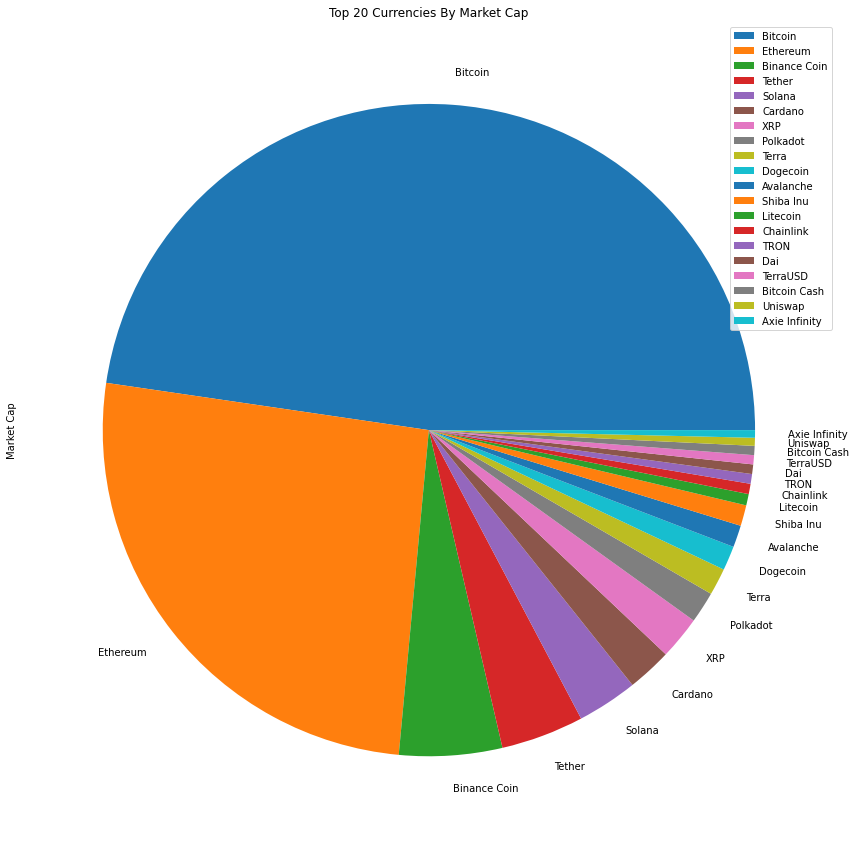

In [9]:
# Pie Chart Showing Top 20 Currencies by Market Cap
top20_pie = top20_market_cap.plot.pie(y='market_cap', x='',ylabel='Market Cap', figsize=(15,15), title='Top 20 Currencies By Market Cap') 

<AxesSubplot:title={'center':'Top 10 Currencies By Market Cap'}, ylabel='Market Cap'>

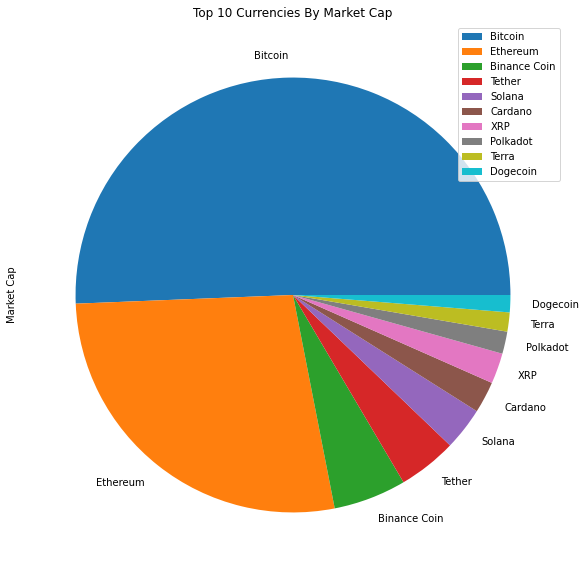

In [10]:
# Pie Chart Showing Top 10 Currencies by Market Cap
top10_market_cap.plot.pie(y='market_cap', x='',ylabel='Market Cap', figsize=(10,10), title='Top 10 Currencies By Market Cap') 

## Combine Visualizations

In [11]:
(top10_market_cap.hvplot.bar(x='symbol', y=['circulating_supply', 'max_supply'], stacked=True, rot=90, legend='top_left', width=600, title='Top 10 Currencies by Market Cap: Circulating Supply vs. Max Supply') +
 top10_market_table)

:Layout
   .Bars.I  :Bars   [symbol,Variable]   (value)
   .Table.I :Table   [symbol,market_cap,circulating_supply,max_supply,price]

In [12]:
(top10_market_cap.hvplot.bar(x='symbol', y=['market_cap'], stacked=True, rot=90, legend='top_left', width=700, title='Top 10 Currencies by Market Cap') +
 top10_market_table)

:Layout
   .Bars.I  :Bars   [symbol,Variable]   (value)
   .Table.I :Table   [symbol,market_cap,circulating_supply,max_supply,price]

In [13]:
(top10_market_cap.hvplot.bar(x='symbol', y=['price'], stacked=True, rot=90, legend='top_left', width=700, title='Top 10 Currencies by Price') +
 top10_market_table)

:Layout
   .Bars.I  :Bars   [symbol,Variable]   (value)
   .Table.I :Table   [symbol,market_cap,circulating_supply,max_supply,price]

## More Visualizations

---

## Monte Carlo

In [271]:
#Import data from a csv file: Bitcoin.
btc_df = pd.read_csv("./btc_historical")

btc_df

,Date,close,returns
0,2017-01-01,995.62,NaN
1,2017-01-02,1013.94,0.018401
2,2017-01-03,1030.45,0.016283
3,2017-01-04,1122.22,0.089058
4,2017-01-05,1002.48,-0.106699
...,...,...,...
1798,2021-12-04,49313.58,-0.079726
1799,2021-12-05,49503.50,0.003851
1800,2021-12-06,50630.91,0.022774
1801,2021-12-07,50672.51,0.000822


In [272]:
#Import data from a csv file: Binance.
bnb_df = pd.read_csv("./bnb_historical")

bnb_df

,Date,close,returns
0,2017-07-14,0.09,NaN
1,2017-07-15,0.07,-0.222222
2,2017-07-16,0.07,0.000000
3,2017-07-17,0.09,0.285714
4,2017-07-18,0.09,0.000000
...,...,...,...
1604,2021-12-04,570.75,-0.040079
1605,2021-12-05,559.83,-0.019133
1606,2021-12-06,589.88,0.053677
1607,2021-12-07,579.32,-0.017902


In [273]:
#Import data from a csv file: Ethereum.
eth_df = pd.read_csv("./eth_historical")

#Rename "unnamed:0 column to "date".
eth_df = eth_df.rename(columns={"Unnamed: 0": "Date"})

eth_df

,Date,close,returns
0,2017-01-01,8.17,NaN
1,2017-01-02,8.35,0.022032
2,2017-01-03,9.58,0.147305
3,2017-01-04,11.00,0.148225
4,2017-01-05,10.23,-0.070000
...,...,...,...
1798,2021-12-04,4128.87,-0.021391
1799,2021-12-05,4207.94,0.019151
1800,2021-12-06,4363.04,0.036859
1801,2021-12-07,4310.68,-0.012001


In [274]:
#Import data from a csv file: Cardano.
ada_df = pd.read_csv("./ada_historical")

ada_df

,Date,close,returns
0,2017-10-01,0.02,NaN
1,2017-10-02,0.03,0.500000
2,2017-10-03,0.02,-0.333333
3,2017-10-04,0.02,0.000000
4,2017-10-05,0.02,0.000000
...,...,...,...
1525,2021-12-04,1.42,-0.089744
1526,2021-12-05,1.38,-0.028169
1527,2021-12-06,1.43,0.036232
1528,2021-12-07,1.38,-0.034965


In [275]:
#Import data from a csv file: Solana.
sol_df = pd.read_csv("./sol_historical")

sol_df

,Date,close,returns
0,2018-01-16,0.35,NaN
1,2018-01-17,0.28,-0.200000
2,2018-01-18,0.20,-0.285714
3,2018-01-19,0.21,0.050000
4,2018-01-20,0.27,0.285714
...,...,...,...
1418,2021-12-04,201.56,-0.045915
1419,2021-12-05,196.86,-0.023318
1420,2021-12-06,194.14,-0.013817
1421,2021-12-07,190.35,-0.019522


## Merge Dataframes


In [276]:
#Create a dictionary of the five dataframes.
to_merge_dict = {"btc": btc_df, "bnb": bnb_df, "eth": eth_df, "ada": ada_df, "sol": sol_df}


In [277]:
# Use a concat to create a merged dataframe from the dictionary. 
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())
merged_df.iloc[[1422]]


btc                             bnb                          eth  \
            Date     close   returns        Date  close   returns        Date   
1422  2020-11-23  18409.51 -0.000458  2021-06-05  390.1 -0.002812  2020-11-23   

                               ada                         sol          \
       close   returns        Date close   returns        Date   close   
1422  609.55  0.087841  2021-08-23  2.92  0.073529  2021-12-08  190.43   

               
      returns  
1422  0.00042

In [278]:
# Configure the Monte Carlo simulation to forecast 5 years cumulative returns. 
MC_10year = MCSimulation(
    portfolio_data = merged_df[:1422],
    weights ="",
    num_simulation=50,
    num_trading_days=252*10
)    

In [279]:
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000
1,1.051498e+00,9.277968e-01,9.696619e-01,0.953887,0.977755,1.042515,1.039419,1.021626e+00,1.053614,9.829779e-01,...,1.006210e+00,1.003256e+00,1.014520e+00,0.944246,0.999778,9.959971e-01,1.032765,9.840057e-01,1.002307e+00,1.031204
2,1.044103e+00,9.845149e-01,9.882714e-01,0.908643,0.979667,1.070242,1.095936,1.026212e+00,1.106123,1.012090e+00,...,1.027030e+00,9.753812e-01,9.372008e-01,0.911894,1.052902,1.115355e+00,1.090011,1.041487e+00,9.961471e-01,1.001752
3,1.123865e+00,9.461228e-01,9.927807e-01,0.897215,0.956966,1.062708,1.119786,1.013330e+00,1.108287,1.074693e+00,...,1.030877e+00,9.745696e-01,9.494620e-01,0.904620,1.047411,1.122531e+00,1.087737,9.943517e-01,1.038008e+00,1.053684
4,1.070599e+00,9.725446e-01,1.051403e+00,0.931052,0.945543,1.127085,1.090210,9.841734e-01,1.132585,1.072484e+00,...,1.078489e+00,9.779550e-01,1.012520e+00,0.908650,1.067839,1.069081e+00,1.171483,9.811724e-01,1.012485e+00,1.022594
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.051407e+06,2.629026e+06,2.172073e+06,716334.577041,377251.348083,285542.096132,402226.655065,1.252456e+08,75306.650831,1.033312e+06,...,2.500452e+08,1.371210e+06,3.153481e+06,89729.238606,91458.154815,2.728310e+06,48373.417154,6.697706e+06,7.053286e+06,218095.940789
2517,5.658218e+06,2.547705e+06,2.126903e+06,724119.322067,377136.699649,282684.807923,398100.752933,1.173281e+08,79576.811462,9.769131e+05,...,2.453928e+08,1.400422e+06,3.021937e+06,84022.334633,91769.374045,2.518291e+06,50032.724356,6.611208e+06,6.620585e+06,217500.518417
2518,5.475150e+06,2.597914e+06,2.151578e+06,705552.856077,373141.880606,289198.909588,420108.604261,1.143405e+08,79766.255439,9.592761e+05,...,2.568124e+08,1.440584e+06,3.084922e+06,82997.304808,92484.813678,2.663258e+06,48886.100033,6.777425e+06,6.957450e+06,220410.757776
2519,5.291820e+06,2.630766e+06,2.151311e+06,749923.655817,362211.997354,283437.026121,455030.072727,1.105565e+08,83025.171521,9.099506e+05,...,2.644031e+08,1.464128e+06,3.046812e+06,85624.339810,93587.870554,2.416458e+06,50877.538247,6.716546e+06,6.934136e+06,236623.299026


In [280]:
MC_10year.portfolio_data

btc                                          bnb          \
            Date     close   returns daily_return        Date   close   
0     2017-01-01    995.62       NaN          NaN  2017-07-14    0.09   
1     2017-01-02   1013.94  0.018401     0.018401  2017-07-15    0.07   
2     2017-01-03   1030.45  0.016283     0.016283  2017-07-16    0.07   
3     2017-01-04   1122.22  0.089058     0.089058  2017-07-17    0.09   
4     2017-01-05   1002.48 -0.106699    -0.106699  2017-07-18    0.09   
...          ...       ...       ...          ...         ...     ...   
1417  2020-11-18  17801.09  0.006721     0.006721  2021-05-31  354.63   
1418  2020-11-19  17824.00  0.001287     0.001287  2021-06-01  362.98   
1419  2020-11-20  18686.56  0.048393     0.048393  2021-06-02  401.21   
1420  2020-11-21  18695.39  0.000473     0.000473  2021-06-03  427.80   
1421  2020-11-22  18417.95 -0.014840    -0.014840  2021-06-04  391.20   

                                    eth                                 \
       returns daily_return        Date   close   returns daily_return   
0          NaN          NaN  2017-01-01    8.17       NaN          NaN   
1    -0.222222    -0.222222  2017-01-02    8.35  0.022032     0.022032   
2     0.000000     0.000000  2017-01-03    9.58  0.147305     0.147305   
3     0.285714     0.285714  2017-01-04   11.00  0.148225     0.148225   
4     0.000000     0.000000  2017-01-05   10.23 -0.070000    -0.070000   
...        ...          ...         ...     ...       ...          ...   
1417  0.086655     0.086655  2020-11-18  479.44 -0.007103    -0.007103   
1418  0.023546     0.023546  2020-11-19  471.71 -0.016123    -0.016123   
1419  0.105323     0.105323  2020-11-20  510.51  0.082254     0.082254   
1420  0.066275     0.066275  2020-11-21  552.48  0.082212     0.082212   
1421 -0.085554    -0.085554  2020-11-22  560.33  0.014209     0.014209   

             ada                                      sol                    \
            Date close   returns daily_return        Date   close   returns   
0     2017-10-01  0.02       NaN          NaN  2018-01-16    0.35       NaN   
1     2017-10-02  0.03  0.500000     0.500000  2018-01-17    0.28 -0.200000   
2     2017-10-03  0.02 -0.333333    -0.333333  2018-01-18    0.20 -0.285714   
3     2017-10-04  0.02  0.000000     0.000000  2018-01-19    0.21  0.050000   
4     2017-10-05  0.02  0.000000     0.000000  2018-01-20    0.27  0.285714   
...          ...   ...       ...          ...         ...     ...       ...   
1417  2021-08-18  2.11  0.093264     0.093264  2021-12-03  211.26 -0.096330   
1418  2021-08-19  2.43  0.151659     0.151659  2021-12-04  201.56 -0.045915   
1419  2021-08-20  2.46  0.012346     0.012346  2021-12-05  196.86 -0.023318   
1420  2021-08-21  2.44 -0.008130    -0.008130  2021-12-06  194.14 -0.013817   
1421  2021-08-22  2.72  0.114754     0.114754  2021-12-07  190.35 -0.019522   

                   
     daily_return  
0             NaN  
1       -0.200000  
2       -0.285714  
3        0.050000  
4        0.285714  
...           ...  
1417    -0.096330  
1418    -0.045915  
1419    -0.023318  
1420    -0.013817  
1421    -0.019522  

[1422 rows x 20 columns]

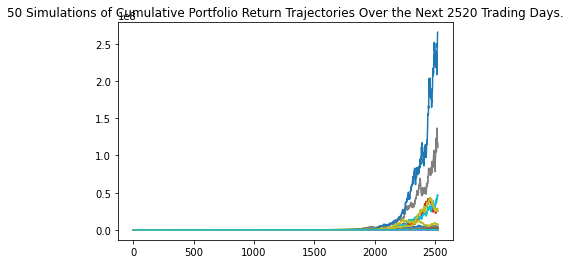

In [281]:
MC_plot = MC_10year.plot_simulation()
MC_plot.get_figure().savefig("MC_10year", bbox_inches="tight")

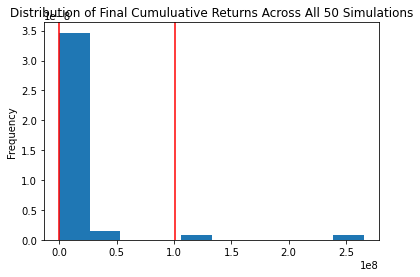

In [282]:
MC_10year = MC_10year.plot_distribution()

MC_10year.get_figure().savefig("MC_10year", bbox_inches="tight")